<class 'pandas.core.frame.DataFrame'>
Index: 5738612 entries, 0 to 719617
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 612.9+ MB
Mean Ride Length: 0 days 00:18:22.020768610
day_of_week    Friday  Monday  Saturday  Sunday  Thursday  Tuesday  Wednesday
member_casual                                                                
casual         300901  244115    416607  342880    260454   247474     240221
member         521113  516532    478027  409293    590749   586295

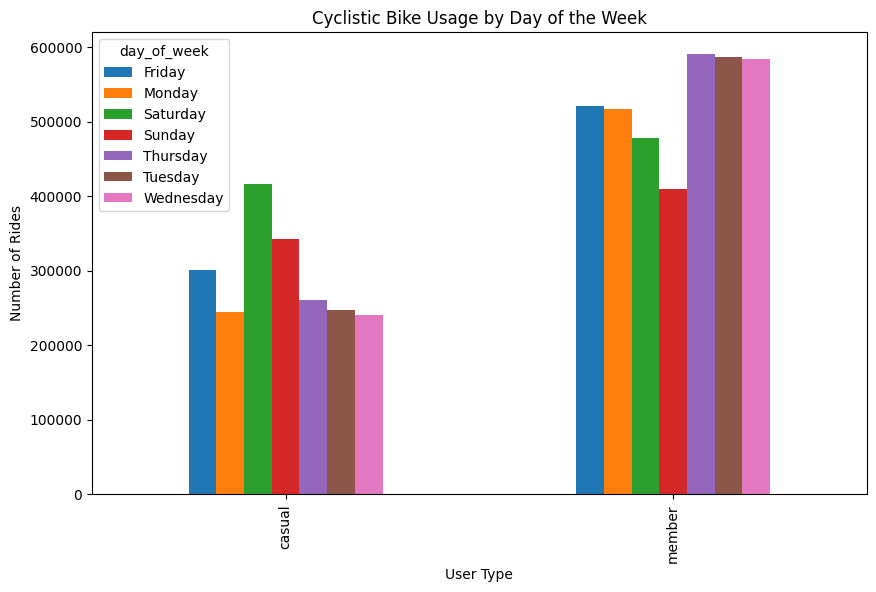

In [ ]:


# Step 2: Import necessary libraries
import pandas as pd
import zipfile
import os
import glob

# Step 3: Upload the ZIP file directly in Colab
# (Assuming the zip file is uploaded to '/content/data.zip')

# Step 4: Unzip the file
with zipfile.ZipFile('/content/data.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/data')

# Step 5: Load all CSV files into a single DataFrame
file_paths = glob.glob('/content/data/*.csv')
all_data = pd.concat([pd.read_csv(file_path) for file_path in file_paths])

# Step 6: Display basic information about the combined dataset
all_data.info()

# Step 7: Perform analysis
# Example: Calculate the mean ride_length
all_data['ride_length'] = pd.to_datetime(all_data['ended_at']) - pd.to_datetime(all_data['started_at'])
mean_ride_length = all_data['ride_length'].mean()
print(f"Mean Ride Length: {mean_ride_length}")

# Example: Group by user type and day of the week
all_data['day_of_week'] = pd.to_datetime(all_data['started_at']).dt.day_name()
usage_by_day = all_data.groupby(['member_casual', 'day_of_week']).size().unstack()
print(usage_by_day)

# Step 8: Create visualizations
import matplotlib.pyplot as plt

# Example: Bar chart for usage by day of the week
usage_by_day.plot(kind='bar', figsize=(10, 6))
plt.title('Cyclistic Bike Usage by Day of the Week')
plt.xlabel('User Type')
plt.ylabel('Number of Rides')
plt.show()


Mean Ride Length:
member_casual
casual    28.253040
member    12.861643
Name: ride_length, dtype: float64


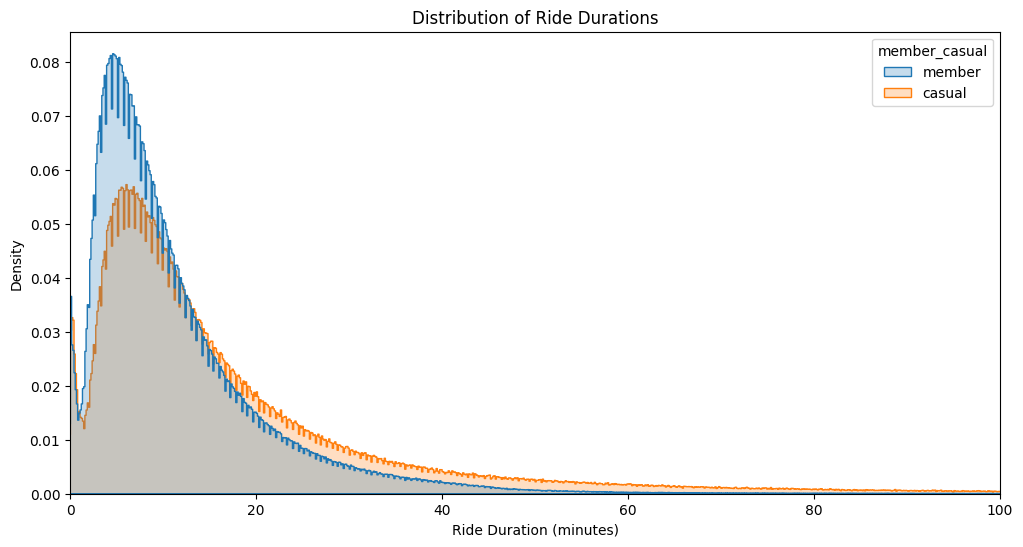

In [ ]:
# Step 1: Calculate average ride duration
all_data['ride_length'] = (pd.to_datetime(all_data['ended_at']) - pd.to_datetime(all_data['started_at'])).dt.total_seconds() / 60  # Convert to minutes

# Calculate mean ride duration
mean_ride_length = all_data.groupby('member_casual')['ride_length'].mean()
print(f"Mean Ride Length:\n{mean_ride_length}")

# Step 2: Visualize the distribution of ride durations
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distribution of ride lengths
plt.figure(figsize=(12, 6))
sns.histplot(data=all_data, x='ride_length', hue='member_casual', element='step', stat='density', common_norm=False)
plt.xlim(0, 100)  # Limit x-axis for better visualization
plt.title('Distribution of Ride Durations')
plt.xlabel('Ride Duration (minutes)')
plt.ylabel('Density')
plt.show()


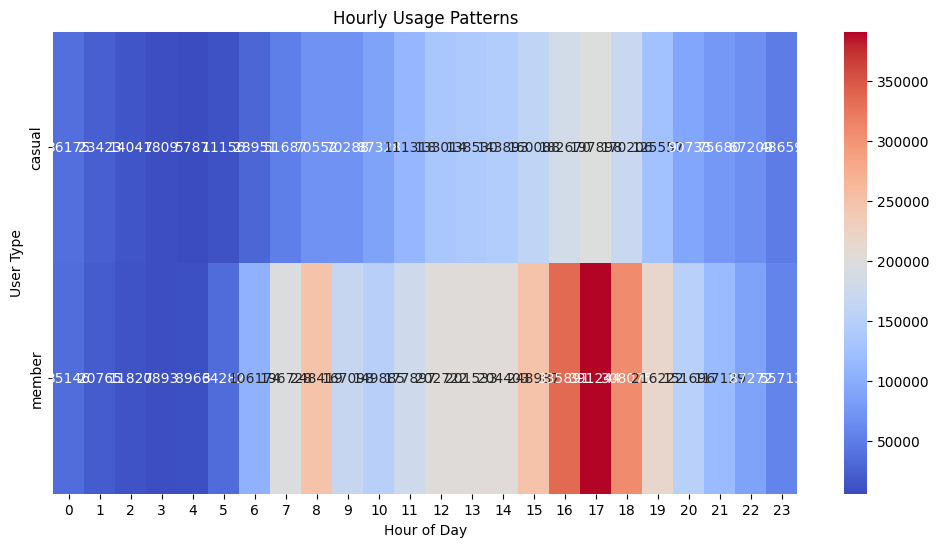

In [ ]:
# Extract hour from start time
all_data['hour_of_day'] = pd.to_datetime(all_data['started_at']).dt.hour

# Calculate the number of rides for each hour
hourly_usage = all_data.groupby(['member_casual', 'hour_of_day']).size().unstack()

# Create a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(hourly_usage, cmap='coolwarm', annot=True, fmt='d')
plt.title('Hourly Usage Patterns')
plt.xlabel('Hour of Day')
plt.ylabel('User Type')
plt.show()


<Figure size 1200x600 with 0 Axes>

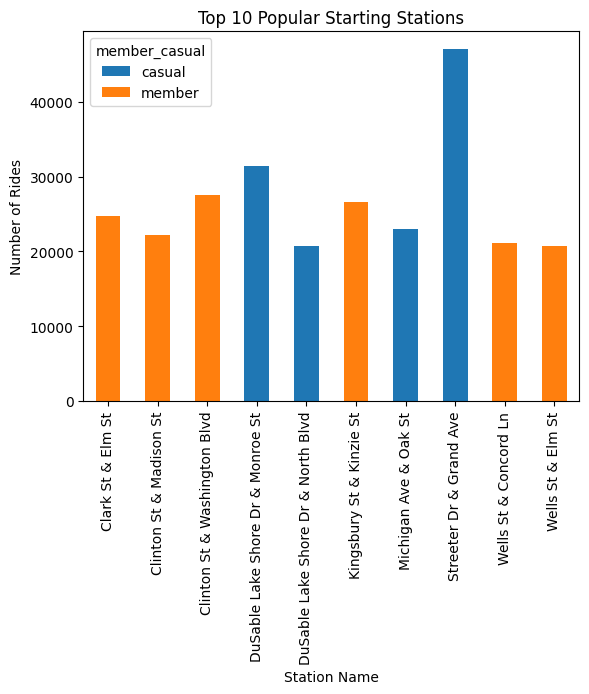

<Figure size 1200x600 with 0 Axes>

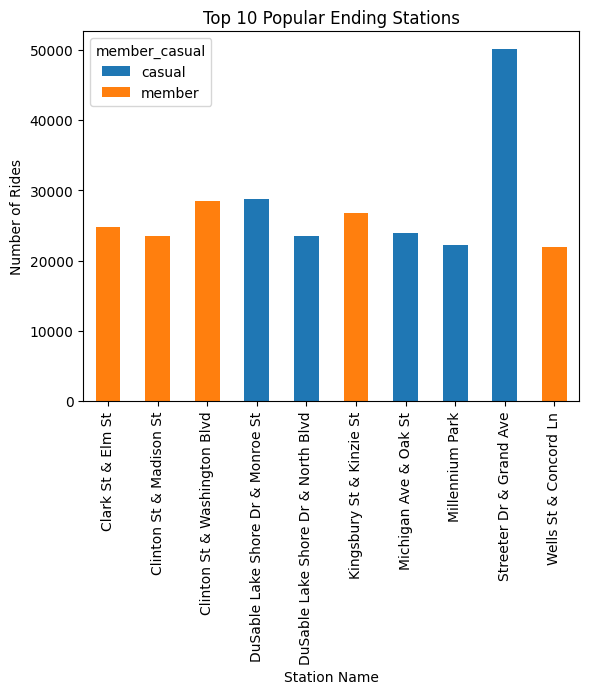

In [ ]:
# Identify the most popular starting and ending stations
popular_start_stations = all_data.groupby(['member_casual', 'start_station_name']).size().nlargest(10).unstack().fillna(0)
popular_end_stations = all_data.groupby(['member_casual', 'end_station_name']).size().nlargest(10).unstack().fillna(0)

# Plot popular start stations
plt.figure(figsize=(12, 6))
popular_start_stations.T.plot(kind='bar', stacked=True)
plt.title('Top 10 Popular Starting Stations')
plt.xlabel('Station Name')
plt.ylabel('Number of Rides')
plt.show()

# Plot popular end stations
plt.figure(figsize=(12, 6))
popular_end_stations.T.plot(kind='bar', stacked=True)
plt.title('Top 10 Popular Ending Stations')
plt.xlabel('Station Name')
plt.ylabel('Number of Rides')
plt.show()


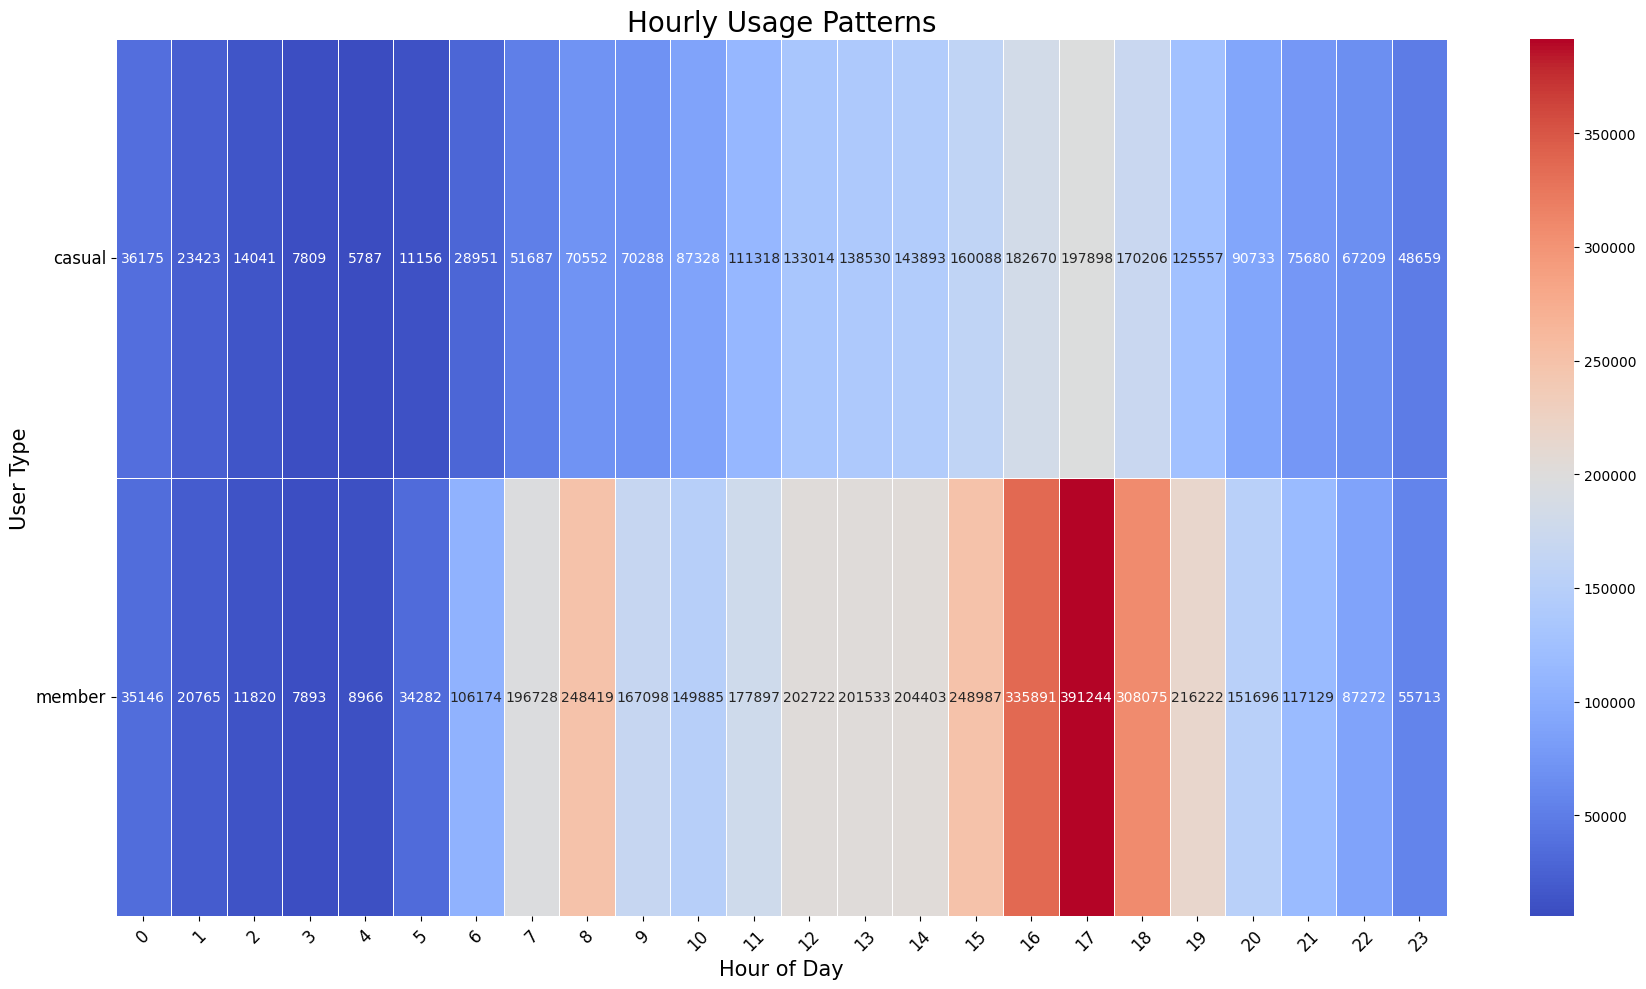

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a larger figure to improve readability
plt.figure(figsize=(18, 10))

# Create the heatmap with improved formatting
sns.heatmap(hourly_usage, cmap='coolwarm', annot=True, fmt='d', linewidths=.5, annot_kws={"size": 10})
plt.title('Hourly Usage Patterns', fontsize=20)
plt.xlabel('Hour of Day', fontsize=15)
plt.ylabel('User Type', fontsize=15)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.tight_layout()

# Save the figure
plt.savefig('hourly_usage_patterns_improved.png', dpi=300)
plt.show()


In [ ]:
!pip install python-pptx

from pptx import Presentation
from pptx.util import Inches
from pptx.enum.text import PP_ALIGN
from pptx.dml.color import RGBColor

# Initialize the presentation
prs = Presentation()

# Slide 1: Title Slide
slide = prs.slides.add_slide(prs.slide_layouts[0])
title = slide.shapes.title
subtitle = slide.placeholders[1]
title.text = "Cyclistic Bike-Share Analysis"
subtitle.text = "Presented by: NAWFEL BOUTABIA"

# Slide 2: Introduction
slide = prs.slides.add_slide(prs.slide_layouts[1])
title = slide.shapes.title
title.text = "Introduction"
content = slide.placeholders[1]
content.text = (
    "Overview of Cyclistic and the business problem:\n"
    "Cyclistic is a bike-share program that aims to increase the number of annual members. "
    "The goal of this analysis is to understand how casual riders and annual members use Cyclistic bikes differently "
    "to inform strategies for converting casual riders into annual members."
)

# Slide 3: Data Preparation
slide = prs.slides.add_slide(prs.slide_layouts[1])
title = slide.shapes.title
title.text = "Data Preparation"
content = slide.placeholders[1]
content.text = (
    "Data sources:\n"
    "- Cyclistic historical trip data\n\n"
    "Data cleaning and preparation process:\n"
    "- Removed duplicates\n"
    "- Handled missing values\n"
    "- Standardized date formats\n"
    "- Created new columns for ride length and day of the week"
)

# Slide 4: Analysis - Usage Patterns by Day of the Week
slide = prs.slides.add_slide(prs.slide_layouts[5])
title = slide.shapes.title
title.text = "Usage Patterns by Day of the Week"
slide.shapes.add_picture('/content/DAY OF THE WEEK.png', Inches(1), Inches(1.5), width=Inches(8))

# Slide 5: Analysis - Distribution of Ride Durations
slide = prs.slides.add_slide(prs.slide_layouts[5])
title = slide.shapes.title
title.text = "Distribution of Ride Durations"
slide.shapes.add_picture('/content/PATH RIDE DURATION.png', Inches(1), Inches(1.5), width=Inches(8))

# Slide 6: Analysis - Hourly Usage Patterns
slide = prs.slides.add_slide(prs.slide_layouts[5])
title = slide.shapes.title
title.text = "Hourly Usage Patterns"
slide.shapes.add_picture('/content/hourly usage patterns.png', Inches(1), Inches(1.5), width=Inches(8))

# Slide 7: Analysis - Popular Starting Stations
slide = prs.slides.add_slide(prs.slide_layouts[5])
title = slide.shapes.title
title.text = "Popular Starting Stations"
slide.shapes.add_picture('/content/starting staion.png', Inches(1), Inches(1.5), width=Inches(8))

# Slide 8: Analysis - Popular Ending Stations
slide = prs.slides.add_slide(prs.slide_layouts[5])
title = slide.shapes.title
title.text = "Popular Ending Stations"
slide.shapes.add_picture('/content/ending station.png', Inches(1), Inches(1.5), width=Inches(8))

# Slide 9: Recommendations
slide = prs.slides.add_slide(prs.slide_layouts[1])
title = slide.shapes.title
title.text = "Recommendations"
content = slide.placeholders[1]
content.text = (
    "Based on the analysis, here are the top three recommendations:\n\n"
    "1. Targeted Marketing Campaigns: Focus on casual riders who frequently ride on weekends and during peak hours.\n"
    "2. Weekend Promotions: Introduce special promotions and discounts for annual memberships during weekends.\n"
    "3. Highlight Membership Benefits: Emphasize the convenience and cost savings of annual memberships for regular users."
)

# Slide 10: Conclusion
slide = prs.slides.add_slide(prs.slide_layouts[1])
title = slide.shapes.title
title.text = "Conclusion"
content = slide.placeholders[1]
content.text = (
    "Summary of key findings:\n"
    "- Casual riders use bikes more on weekends, while members have consistent usage throughout the week.\n"
    "- Casual riders have longer ride durations compared to members.\n"
    "- Members show peak usage during commute hours (morning and evening).\n\n"
    "Next steps:\n"
    "- Implement targeted marketing campaigns and promotions.\n"
    "- Monitor and evaluate the effectiveness of the strategies."
)
# Slide 11: Thank You
slide = prs.slides.add_slide(prs.slide_layouts[1])
title = slide.shapes.title
title.text = "Thank You"
content = slide.placeholders[1]
content.text = (
    "Thank you to all stakeholders and everyone who took the time to watch this presentation. "
    "Your support and feedback are greatly appreciated."
)

# Save the presentation
prs.save('Cyclistic_Bike_Share_Analysis_Presentation 1.pptx')
